## Data Wrangling II
#### Academic Performance Dataset

1. **Scan for Missing Values and Inconsistencies:**
   - Identify missing values and inconsistencies in all variables.
   - Utilize suitable techniques to handle missing values, such as imputation or deletion, depending on the context.
   
2. **Scan for Outliers in Numeric Variables:**
   - Examine numeric variables for outliers.
   - Employ appropriate techniques like z-score, IQR, or visualization to detect and handle outliers.

3. **Apply Data Transformations:**
   - Perform data transformations on at least one variable for the following purposes:
     - Changing scale for better understanding.
     - Converting a non-linear relation into a linear one.
     - Decreasing skewness and achieving a normal distribution.
   - Document the rationale behind the transformation and the chosen approach.

### Generate Sample Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
np.random.seed(0)
data=({
    'Student_ID':range(1,101),
    'Age': np.random.randint(18,25,100),
    'Gender':np.random.choice(['Male','Female'],100),
    'Math':np.random.normal(70,15,100),
    'Science':np.random.normal(65,10,100),
    'English':np.random.normal(75,12,100)
})

In [11]:
data['Math'][10]=np.nan
data['Science'][25]=np.nan
data['English'][50]=200

In [12]:
df=pd.DataFrame(data)

In [13]:
df

,Student_ID,Age,Gender,Math,Science,English
0,1,22,Male,61.922978,53.140808,73.130342
1,2,23,Female,98.626932,74.293994,64.685857
2,3,18,Female,62.863360,70.469520,105.348149
3,4,21,Female,91.610967,56.304077,64.866181
4,5,21,Female,52.763865,77.234279,85.687945
...,...,...,...,...,...,...
95,96,22,Male,89.706890,60.670082,92.931969
96,97,18,Male,60.974371,56.541011,65.093632
97,98,24,Male,61.792543,66.637327,66.597098
98,99,22,Female,79.144762,67.983987,79.478296


In [7]:
df.shape

(100, 6)

### Handle missing values and Inconsistencies

In [15]:
df['Math'].fillna(df['Math'].mean(),inplace=True)
df['Math'].fillna(df['Math'].mean(),inplace=True)
df['Math'].fillna(df['Math'].mean(),inplace=True)

df.loc[df['English'] > 100, 'English'] = np.nan
df['English'].fillna(df['English'].mean(), inplace=True)

#### Detect and Handle Outliers, Identify Outliers using Boxplot

Text(0.5, 1.0, 'Boxplot of Academic Scores')

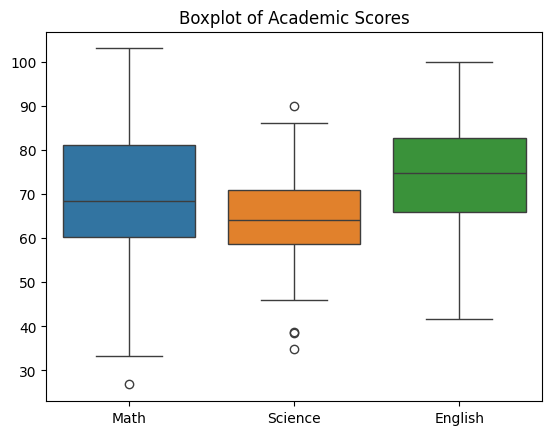

In [16]:
sns.boxplot(df[['Math','Science','English']])
plt.title('Boxplot of Academic Scores')

#### Address outliers using winsorization

In [18]:
from scipy.stats.mstats import winsorize
df['Math'] = winsorize(df['Math'], limits=[0.05, 0.05])
df['Science'] = winsorize(df['Science'], limits=[0.05, 0.05])
df['English'] = winsorize(df['English'], limits=[0.05, 0.05])

<Axes: >

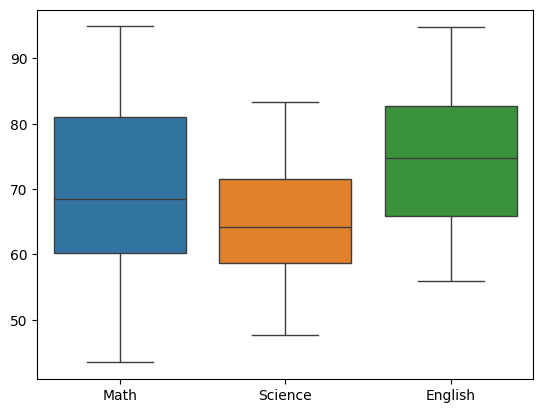

In [19]:
sns.boxplot(df[['Math','Science','English']])

#### Apply data transformations

<Axes: xlabel='Age', ylabel='Count'>

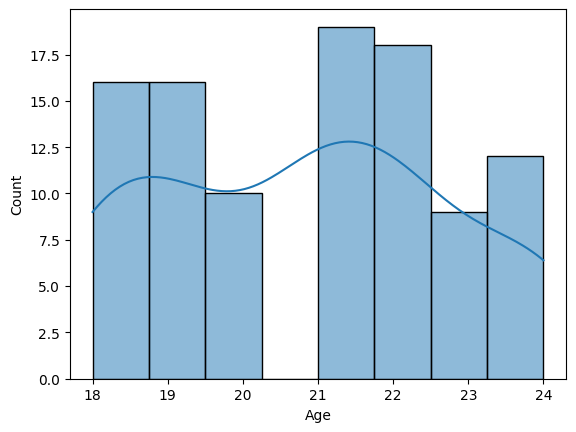

In [21]:
sns.histplot(df['Age'],kde=True)

In [22]:
df['Age_transformed'] = np.log(df['Age'])

<Axes: xlabel='Age_transformed', ylabel='Count'>

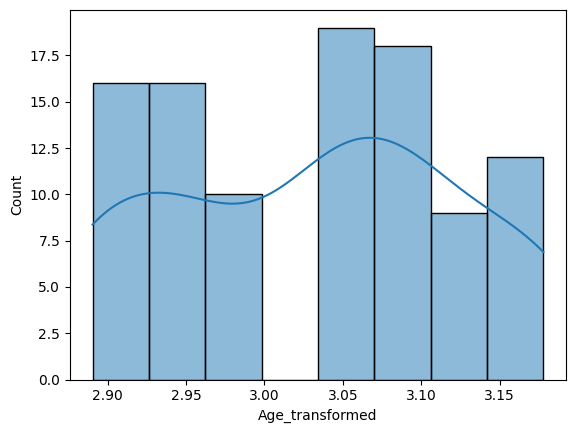

In [23]:
sns.histplot(df['Age_transformed'],kde=True)

### Reasoning for transformation:
- The logarithmic transformation is used to decrease the right skewness of the Age variable and bring it closer to a normal distribution. This helps in better understanding the age distribution of students in the dataset.